In [136]:
# impor the libraries 
import pandas as pd 
from sklearn.linear_model  import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [137]:
# read data from the csv file 
data = pd.read_csv("dataset/Dataset.csv",sep=",")

In [138]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [139]:
# row and column in the dataset 
data.shape

(506, 13)

In [140]:
# extract the 'RM' independent variable and dependent variable 'MEDV'
examples_col_names = ['RM','MEDV']
examples_dataset = data[examples_col_names]

In [141]:
examples_dataset.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [142]:
# check for the duplicate entries 
duplicate_entries = examples_dataset[examples_dataset.duplicated()]
duplicate_entries


,RM,MEDV


In [143]:
# check for the null value and its dtype
examples_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      506 non-null    float64
 1   MEDV    506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


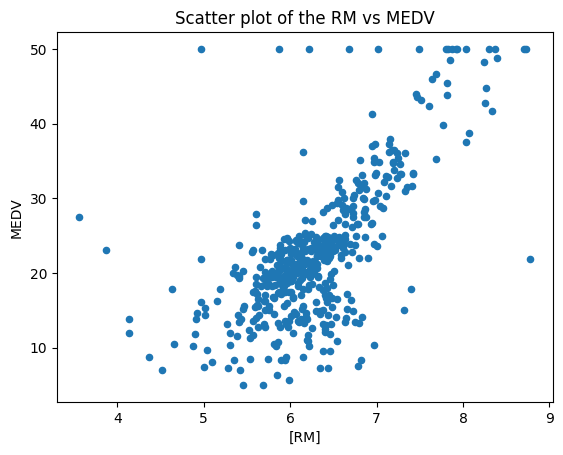

In [144]:
# scatter plot 
examples_dataset.plot(kind='scatter',x=[examples_col_names[0]],y=examples_col_names[1])
plt.title(f"Scatter plot of the {examples_col_names[0]} vs {examples_col_names[1]}")
plt.show()

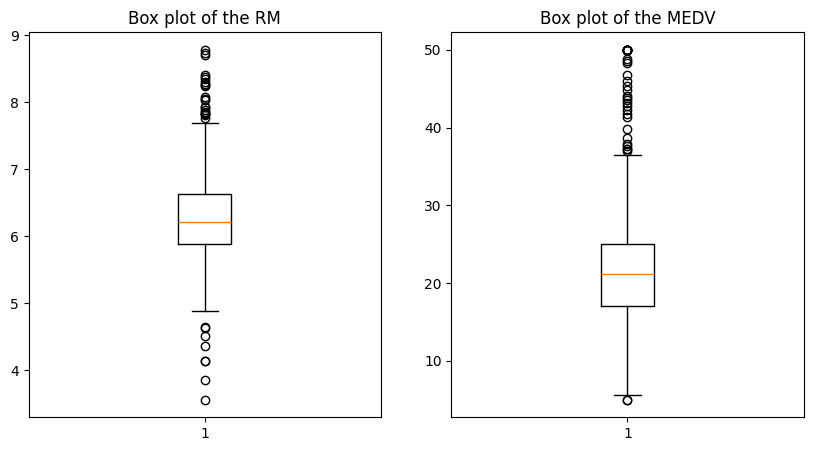

In [145]:
# draw the box plot of independent variable 
fig,axes = plt.subplots(ncols=2,figsize=(10,5))
for ax,col_name in zip(axes,examples_col_names):
    ax.boxplot(x=examples_dataset[col_name])
    ax.set_title(f"Box plot of the {col_name}")
plt.show()

In [146]:
# calculate the quartiles 
q1 = examples_dataset.quantile(q=0.25)
q3 = examples_dataset.quantile(q=0.75)
q1,q3

(RM       5.8855
 MEDV    17.0250
 Name: 0.25, dtype: float64,
 RM       6.6235
 MEDV    25.0000
 Name: 0.75, dtype: float64)

In [147]:
# calculate the inter-quartile range 
iqr = q3-q1
iqr

RM      0.738
MEDV    7.975
dtype: float64

In [148]:
# calculate the cutoff value 
cutoff_low  = q1 - (1.5 * iqr)
cutoff_high = q3 + (1.5 * iqr)
cutoff_low,cutoff_high


(RM      4.7785
 MEDV    5.0625
 dtype: float64,
 RM       7.7305
 MEDV    36.9625
 dtype: float64)

In [149]:
#mask for the filtering the data 
cutoff_mask = (examples_dataset>=cutoff_low) & (examples_dataset<=cutoff_high)

In [150]:
filter_data = examples_dataset[cutoff_mask.all(axis=1)]

In [151]:
filter_data.shape

(457, 2)

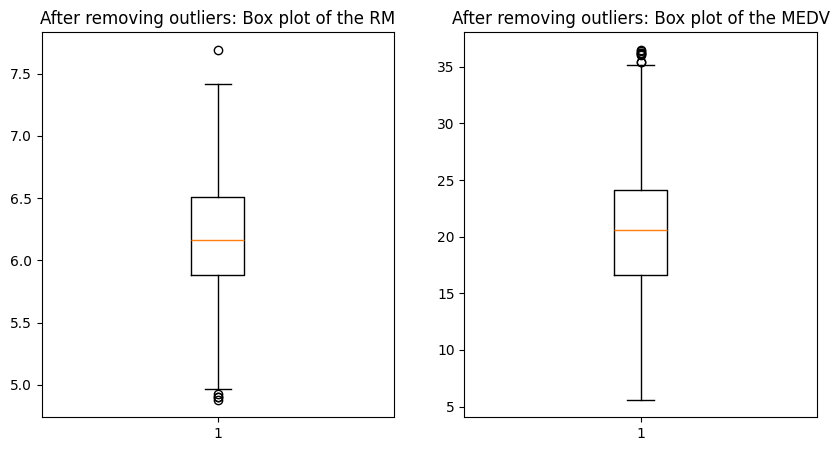

In [152]:
# draw the box plot of independent variable 
fig,axes = plt.subplots(ncols=2,figsize=(10,5))
for ax,col_name in zip(axes,examples_col_names):
    ax.boxplot(x=filter_data[col_name])
    ax.set_title(f"After removing outliers: Box plot of the {col_name}")
plt.show()

In [153]:
# calculate the correlation matrix 
corr_matrix = filter_data.corr()
corr_matrix

,RM,MEDV
RM,1.000000,0.614818
MEDV,0.614818,1.000000


<Axes: >

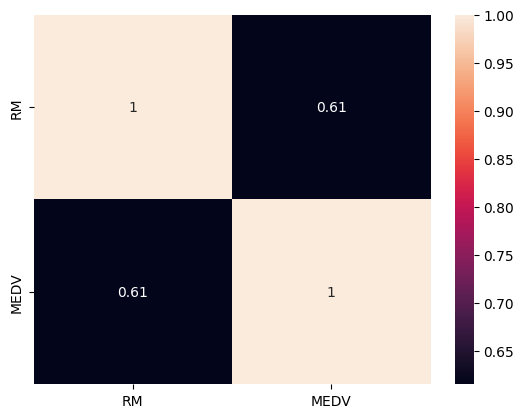

In [154]:
import seaborn as sns 

# draw heatmap for the corr_matrix 
sns.heatmap(corr_matrix,annot=True)

In [155]:
# extract the independent and dependent varaibles 
X = filter_data[examples_col_names[0]]
y= filter_data[examples_col_names[1]]

In [156]:
X.shape,y.shape

((457,), (457,))

In [157]:
#reshape the dataset in 2D 
X = X.values.reshape(-1,1)
y= y.values.reshape(-1,1)

In [158]:
X.shape,y.shape

((457, 1), (457, 1))

In [159]:
# selection of data for the train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [160]:
X_train.shape,X_test.shape

((365, 1), (92, 1))

In [161]:
# initalize the linear regression model 
model = LinearRegression()

In [162]:
# train the model
model.fit(X=X_train,y=y_train)

LinearRegression()

In [163]:
# y-intercept and slope 
b1 = model.intercept_
b0 = model.coef_
b1,b0

(array([-26.86866038]), array([[7.68151198]]))

In [164]:
# prediction on the test dataset 
y_predict = model.predict(X=X_test)


In [165]:
# evaluate the model 
mse = mean_squared_error(y_test,y_pred=y_predict) 
mae = mean_absolute_error(y_test,y_predict)
r2_error = r2_score(y_true=y_test,y_pred=y_predict)
mse,mae,r2_error

(np.float64(25.620851597219232),
 np.float64(3.717161179285387),
 0.3695582549961678)

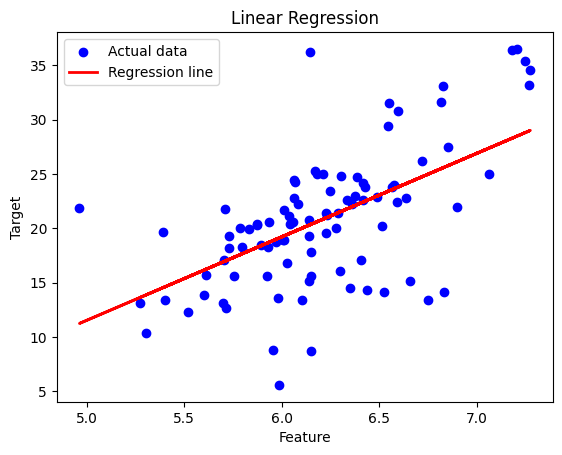

In [166]:
# fit the regression line 
# plot the test data as scatter and regression line 
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_predict, color='red', linewidth=2, label='Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.show()

<h5>Non-linear regression</h5>

In [167]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [168]:
model = Pipeline([
 ('poly', PolynomialFeatures(degree=2)),
  ('linear', LinearRegression(fit_intercept=False))
])

In [169]:
model

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [170]:
model.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [171]:
y_predict = model.predict(X_test)

In [172]:
import numpy as np
# Generate a range of values for a smooth curve
X_range = np.linspace(min(X)[0], max(X)[0], 100).reshape(-1, 1)

# Predict using the model
y_range_pred = model.predict(X_range)

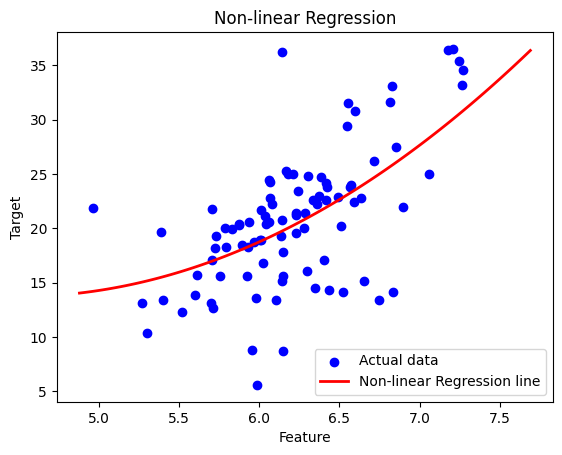

In [173]:

# fit the regression line 
# plot the test data as scatter and regression line 
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_range, y_range_pred, color='red', linewidth=2, label='Non-linear Regression line')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Non-linear Regression')
plt.legend()
plt.show()

In [174]:
# evaluate the model 
mse = mean_squared_error(y_test,y_pred=y_predict) 
mae = mean_absolute_error(y_test,y_predict)
r2_error = r2_score(y_true=y_test,y_pred=y_predict)
mse,mae,r2_error

(np.float64(24.192301642170822),
 np.float64(3.711523695786588),
 0.4047099954864649)

In [175]:
import joblib

#save the model
joblib.dump(model,"simple_nonlinear_regression.pkl")


['simple_nonlinear_regression.pkl']